***Executive Summary***

This report is provided for the data analytics project with the goal of performing a reasonable analysis of the data given. The general task of your project is to understand what impacts success in the two subjects Mathematics and Portuguese, from student achievement in secondary education of two Portuguese schools. The data is in 948 rows and 40 columns. The target variable is ‘G1. Math’. The algorithm that is used for machine learning model is the regression and for task 2 after categorizing the grade of math we use the classification model.
After loading the data and understanding each variable, I cleaned the data and removed the garbage variables. Then I transformed ‘famsup’ related variables into yes/ no, type ‘object’ and created new variables as an int and replace yes with 1 and no with zero, and check the categorical variable , we transform to dummy variable and change the type of them to integer for using correlation between variables and G1.math , and before that we check the standard deviation and garbage value and null value for cleaning dada ( preprocessing ) after that we virtualizing the data for better deciding and finding the data . In the next step, I checked the linear correlation of the variables. I performed simple data exploration using visualization for all the features. I define a new data frame “G1Math_df2” with absences. Port, famsup, Walc, failures.Port, studytime, famrel,higher_yes,failure.math and  G1.Math’
After visualizing the distributions and outliers, I chose my feature variables and split my data set into test data and train data. Then I selected” Random Forest classifier “among 6 algorithms by accuracy in task 1 : 84% and task 2 after categorizing into 3 for target variabel G1.math the accuracy improved and it is 90%.
 and the ROC-AUC was 0.95 for class 2.0 , 0.94 for class 0.0, and 0.89 for class 1.0 but with improving the model using the l2 penalty (which is used in Ridge regression) and removing the variables with small coefficient in the model without the te task1 should be use in the modelI drop  ( schoolsup_yes), and check the model it,s 1 percent changes so I decided dont use this column in our prediction.
 an increase in AUC signifies an improvement in the model's ability to differentiate between classes, while an increase in accuracy indicates an overall enhancement in the model's ability to correctly identify instances. However, paying attention to both metrics can provide a more comprehensive understanding of the model's performance.
. 

 

## 1.Introduction

Data analytics is the collection, transformation, and organization of data to conclude, make predictions, and drive informed decision-making. The data in the file is about student achievement in secondary education at two Portuguese schools. The data attributes include student grades, demographic, social, and school-related features and it was collected using school reports and questionnaires. Therefore, the algorithm used for the machine learning model is based on supervised and there are regression or classification. Classification algorithms utilize input training data to predict the likelihood or probability that the data that follows will fall into one of the predetermined categories.
After loading the data and understanding each variable, I cleaned the data and performed data exploration using visualization. In the next step, I process models to find the best model for this type of output. We have discrete variables that are similar to continuous variables due to the small distance between them. In the end, according to these data, we checked whether by classifying the information, our prediction of students' grades would improve or not and whether the accuracy measurement would be checked. 


## 2. Data Set

### 2.1	student achievement Data set
The dataset is provided in ‘csv’ type. After importing the data set, the first step is getting some information about the shape of the data set and variables.
The data in the file is about student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. There are 948 rows and 40 Columns. (dtypes: float64(1), int64(18), object(18))*
The features of the raw data set with their corresponding descriptions are as below:
The features failures, paid, absences, G1, G2, G3 are recorded for the Math subject and the Portuguese subject, hence a corresponding suffix has been added to the variable name.



## 3. Data Pre-Processing

in this step we import the main libraries that we need


In [1]:
#| label: import-libraries
# importing main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import warnings
from sklearn.feature_selection import VarianceThreshold
warnings.filterwarnings("ignore")

To use data, we need to import them and read the data. In this case, our data is CSV files, and it is in the folder whose name is data.


In [2]:
#| label: data-import
# Import your data here.
df = pd.read_csv('data\exam_data.csv')
df.head() 

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,absences.Math,G1.Math,G2.Math,G3.Math,failures.Port,paid.Port,absences.Port,G1.Port,G2.Port,G3.Port
0,227.0,GP,M,16,U,GT3,T,1,2,services,...,2,11,12,11,0,no,0,10,9,11
1,361.0,MS,M,18,R,GT3,T,4,2,other,...,14,6,5,5,1,yes,0,7,7,0
2,260.0,GP,M,16,U,LE3,T,2,2,services,...,8,9,9,9,0,no,4,12,11,11
3,267.0,GP,M,17,R,GT3,T,1,3,other,...,20,9,7,8,1,no,14,12,11,11
4,2.0,GP,F,15,R,GT3,T,1,1,other,...,2,8,6,5,0,no,2,13,11,11


In [3]:
#| label: show how many rows and coloumn in data set
df.shape

(948, 40)

In [4]:
#| label: Get inforaion
# getting data on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     948 non-null    float64
 1   school         948 non-null    object 
 2   sex            948 non-null    object 
 3   age            948 non-null    int64  
 4   address        948 non-null    object 
 5   famsize        948 non-null    object 
 6   Pstatus        948 non-null    object 
 7   Medu           948 non-null    int64  
 8   Fedu           948 non-null    int64  
 9   Mjob           948 non-null    object 
 10  Fjob           948 non-null    object 
 11  reason         948 non-null    object 
 12  guardian       948 non-null    object 
 13  traveltime     948 non-null    int64  
 14  studytime      948 non-null    int64  
 15  schoolsup      948 non-null    object 
 16  famsup         948 non-null    object 
 17  activities     948 non-null    object 
 18  nursery   

### 3.1	Data Cleaning

The steps followed for the data set is given below:

#### 3.1.1 Dropping unnecessary columns and rows:

Dropping unnecessary columns and rows is a data preprocessing step that involves removing specific columns or rows from a dataset that are deemed unnecessary for the analysis or modeling task at hand. This process is beneficial for several reasons. Reducing Dimensionality, Improving Computational Efficiency, Enhancing Model Performance, and so on .
At this stage, I check the data, and in this step,  model must contain the variables absences.Port, famsup, Walc, failures.Port, studytime, famrel but not the variables Fedu, Medu, age. 
so I droped the Fedu, Medu, age.


In [5]:
# drop the column on dataset
df.drop('Fedu', axis=1, inplace=True)
df.drop('Medu', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     948 non-null    float64
 1   school         948 non-null    object 
 2   sex            948 non-null    object 
 3   address        948 non-null    object 
 4   famsize        948 non-null    object 
 5   Pstatus        948 non-null    object 
 6   Mjob           948 non-null    object 
 7   Fjob           948 non-null    object 
 8   reason         948 non-null    object 
 9   guardian       948 non-null    object 
 10  traveltime     948 non-null    int64  
 11  studytime      948 non-null    int64  
 12  schoolsup      948 non-null    object 
 13  famsup         948 non-null    object 
 14  activities     948 non-null    object 
 15  nursery        948 non-null    object 
 16  higher         948 non-null    object 
 17  internet       948 non-null    object 
 18  romantic  

#### 3.1.2 Checking for missing values

In most cases, we do not get complete datasets. They either have some values missing from the rows and columns or they do not have standardized values.
So, before going ahead with the analysis, it is a good idea to check whether the dataset has any missing values. 
in this step all data check and there didn’t find any missing value.  


In [6]:
# Drop rows with null values
df = df.dropna()
#df.info()
df.shape

(948, 37)

in this step we check the missing value and there are no missing value anf the row not need to drop.


In [7]:
# Checking for missing values in the entire dataset
missing_values = df.isnull().sum()
# Printing the result
print(missing_values)
df.shape

Unnamed: 0       0
school           0
sex              0
address          0
famsize          0
Pstatus          0
Mjob             0
Fjob             0
reason           0
guardian         0
traveltime       0
studytime        0
schoolsup        0
famsup           0
activities       0
nursery          0
higher           0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
Dalc             0
Walc             0
health           0
failures.Math    0
paid.Math        0
absences.Math    0
G1.Math          0
G2.Math          0
G3.Math          0
failures.Port    0
paid.Port        0
absences.Port    0
G1.Port          0
G2.Port          0
G3.Port          0
dtype: int64


(948, 37)

we do not have any value for replacing with missing data if we have ve can replace it or drop it . 


In [8]:
# counting the missing value in case the data set is very big and replace it 
num_missing_values = 0
for column in df.columns:
  for item in df[column].isnull():
    if item == True:
      num_missing_values += 1

num_missing_values

0

#### 	3.1.3 Checking for garbage values

Garbage value is generally a term meaning that the value in a variable doesn't have some sort of planned meaning.
By checking the statistical information of the data, some variables have negative values, and some have 0 values which are not compatible with the definition (corresponding to the dataset).
The detail of these values is given in the following tables:

*** Negative Values and Zero for deleting ***

by this code we can check the data for minus and zero if it is not compatible by the meaning they have.


In [9]:
# get name the columns
df.columns

Index(['Unnamed: 0', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup',
       'famsup', 'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'failures.Math', 'paid.Math', 'absences.Math', 'G1.Math', 'G2.Math',
       'G3.Math', 'failures.Port', 'paid.Port', 'absences.Port', 'G1.Port',
       'G2.Port', 'G3.Port'],
      dtype='object')

In [10]:
# Checking the negative values of studytime
df[df['studytime']<0]['studytime'].value_counts()
df['studytime'].value_counts()

studytime
2    475
1    253
3    160
4     60
Name: count, dtype: int64

In [11]:
# Checking the 0 values of sex
df[df['Walc']==0]['Walc'].value_counts()
df['Walc'].value_counts()

Walc
1    360
2    222
3    187
4    111
5     68
Name: count, dtype: int64

we checked the data , and there are any value of minus and zero so the rows not be changed .

#### 	3.1.4 Checking the distribution of each variable 

Checking the distribution of each variable involves examining the spread and pattern of values within individual columns or features in a dataset. Understanding the distribution helps you gain insights into the central tendencies, variability, and shape of the data. This is crucial for making informed decisions during data analysis and modeling. Common statistical measures used to describe the distribution include mean, median, and standard deviation.

In this phase, first we checked the numeric variables with zero variance (threshold = 0), *they do not have any contribution on the model*.at this data we do not have any standard deviation equal to zero. so this step we didnt drop anything.
only drop some columns such as unnamed ( column1 for indexing ) and some column that in the task announced to drop it such as Grad in port and math.


In [12]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.shape

(948, 19)

In [13]:
# finding zero variance variables
selector_vr= VarianceThreshold(threshold=0)
selector_vr.fit_transform(df_numeric)
selector_vr.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64)

In [14]:
df = df.drop([ 'G3.Port','G2.Port','G1.Port','G3.Math','G2.Math'],axis=1)
df = df.drop(['Unnamed: 0'],axis=1)
df.head()
df.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'failures.Math',
       'paid.Math', 'absences.Math', 'G1.Math', 'failures.Port', 'paid.Port',
       'absences.Port'],
      dtype='object')

check the standard deviation if there are value near the zero , we can delete it . 

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
traveltime,948.0,1.417722,0.680535,1.0,1.0,1.0,2.0,4.0
studytime,948.0,2.028481,0.829900,1.0,1.0,2.0,2.0,4.0
famrel,948.0,3.939873,0.897946,1.0,4.0,4.0,5.0,5.0
freetime,948.0,3.272152,0.969321,1.0,3.0,3.0,4.0,5.0
goout,948.0,3.119198,1.124523,1.0,2.0,3.0,4.0,5.0
Dalc,948.0,1.478903,0.869875,1.0,1.0,1.0,2.0,5.0
Walc,948.0,2.266878,1.273348,1.0,1.0,2.0,3.0,5.0
health,948.0,3.624473,1.392510,1.0,3.0,4.0,5.0,5.0
failures.Math,948.0,0.287975,0.706272,0.0,0.0,0.0,0.0,3.0
absences.Math,948.0,5.290084,7.366354,0.0,0.0,2.0,8.0,75.0


now we check the data type object for showing the frequency of top elemans in each feature.


In [16]:
# Displaying some statistics about categorical data
df.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,activities,nursery,higher,internet,romantic,paid.Math,paid.Port
count,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,yes,yes,yes,yes,no,no,no
freq,840,512,735,670,854,348,531,322,667,823,571,488,764,900,822,625,500,898


### 3.2 Data Transformation

#### 3.2.1 Transforming the categorical variables

If we have a column that is object for example yes or no question or if we have Boolean, we can convert them to integer.in this stage I created the new column. 
in this step we change type of ‘famsup’ from object to integer for using the model.
Encoding for famsup: 1 for 'yes', 0 for 'no'
I use the new data frame for own data with own selected column for better decision in others steps.

In [17]:
df.describe()

,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,failures.Math,absences.Math,G1.Math,failures.Port,absences.Port
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,1.417722,2.028481,3.939873,3.272152,3.119198,1.478903,2.266878,3.624473,0.287975,5.290084,10.950422,0.135021,3.822785
std,0.680535,0.829900,0.897946,0.969321,1.124523,0.869875,1.273348,1.392510,0.706272,7.366354,3.376837,0.484956,5.141321
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,8.000000,0.000000,0.000000
50%,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,2.000000,11.000000,0.000000,2.000000
75%,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,0.000000,8.000000,13.000000,0.000000,6.000000
max,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,75.000000,19.000000,3.000000,32.000000


In [18]:
# Specify the columns want to keep
selected_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'failures.Math',
       'paid.Math', 'absences.Math', 'G1.Math', 'failures.Port', 'paid.Port',
       'absences.Port']

# Create a new DataFrame with only the selected columns
G1Math_df = df[selected_columns]

# Display the new DataFrame
print(G1Math_df)

    school sex address famsize Pstatus      Mjob      Fjob      reason  \
0       GP   M       U     GT3       T  services  services       other   
1       MS   M       R     GT3       T     other     other        home   
2       GP   M       U     LE3       T  services  services  reputation   
3       GP   M       R     GT3       T     other     other      course   
4       GP   F       R     GT3       T     other     other  reputation   
..     ...  ..     ...     ...     ...       ...       ...         ...   
943     GP   F       U     GT3       T     other     other  reputation   
944     GP   F       U     GT3       T    health  services  reputation   
945     GP   M       U     GT3       T  services   teacher      course   
946     GP   M       U     LE3       T     other     other        home   
947     GP   M       U     GT3       T     other     other      course   

    guardian  traveltime  ...  Dalc Walc health failures.Math paid.Math  \
0     mother           1  ...     1 

In [19]:
"""Ordinal Encoding for famsup: 1:yes, 0:no,"""
#using Map Function
G1Math_df = G1Math_df.copy()

# Ordinal Encoding for famsup: 1 for 'yes', 0 for 'no'
ordinal_map = {'yes': 1, 'no': 0}
G1Math_df['famsup'] = G1Math_df['famsup'].map(ordinal_map)
G1Math_df['famsup'] = G1Math_df['famsup'].astype(int)

In [20]:
G1Math_df.info()
#G1Math_df.head()
G1Math_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   school         948 non-null    object
 1   sex            948 non-null    object
 2   address        948 non-null    object
 3   famsize        948 non-null    object
 4   Pstatus        948 non-null    object
 5   Mjob           948 non-null    object
 6   Fjob           948 non-null    object
 7   reason         948 non-null    object
 8   guardian       948 non-null    object
 9   traveltime     948 non-null    int64 
 10  studytime      948 non-null    int64 
 11  schoolsup      948 non-null    object
 12  famsup         948 non-null    int32 
 13  activities     948 non-null    object
 14  nursery        948 non-null    object
 15  higher         948 non-null    object
 16  internet       948 non-null    object
 17  romantic       948 non-null    object
 18  famrel         948 non-null   

(948, 31)

#### 3.2.2 Normalization, standardization, scaling

The data normalization process lowers the scale and brings all the data-points on the same scale.
Normalization: It involves scaling the values of a variable to a specific range, usually between 0 and 1
Standardization (Z-score normalization): It transforms the data to have a mean of 0 and a standard deviation of 1.
Scaling: is a general term for any transformation that alters the range of the data.
I use scaling in the model selection 


## 4 Data Exploration

We put our visualization here.

### 4.1 Finding outliers , dummy variable

the majority of the data. The use of outlier detection methods depends on the type of data and the analysis objective. However, generally, these methods are commonly applied to numerical columns or continuous variables. The reason for this is that the concept of outliers is more definable in continuous variables, and statistical measures such as mean, standard deviation, box plots, can easily be employed for their identification.
for founding the outliers of discrete and categorical variables we need to find the type of variables are integer or objects. We find the outliers and the Q1, Q3 and compare it with data and count how much of each independent variable out of this range and recognize and virtualize it .
For each integer variable, I use boxplot and histogram for visualization. The plots are as bellows:


In [21]:
G1Math_df.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'failures.Math',
       'paid.Math', 'absences.Math', 'G1.Math', 'failures.Port', 'paid.Port',
       'absences.Port'],
      dtype='object')

In [22]:
intG1Math_df = G1Math_df.select_dtypes(include='integer')
intG1Math_df.columns

Index(['traveltime', 'studytime', 'famsup', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'failures.Math', 'absences.Math', 'G1.Math',
       'failures.Port', 'absences.Port'],
      dtype='object')

we find the outliers and the Q1 , Q3 and compaire it with data and count how much of each independent variable out of this range and recognize and virtualized it . 

**absences.Port**

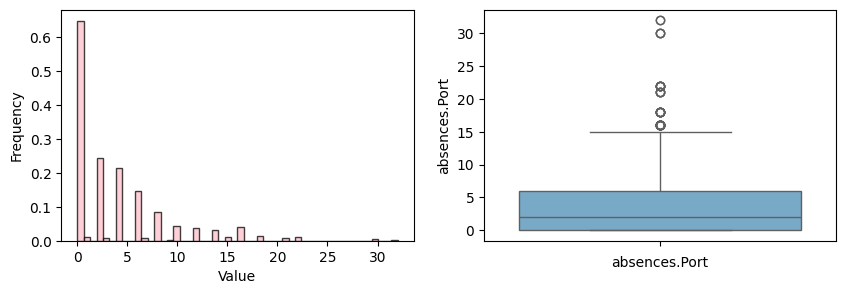

In [23]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(G1Math_df['absences.Port']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='absences.Port', data=G1Math_df,palette="Blues")
plt.xlabel('absences.Port')
plt.show()

In [24]:
#calculate IQR and show thw outliers
Q1 = G1Math_df['absences.Port'].quantile(0.25)
Q3 = G1Math_df['absences.Port'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_absences_Port = (df['absences.Port'] < Q1 - 1.5 * IQR) | (df['absences.Port'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_absences_Port  = G1Math_df.loc[outliers_absences_Port, 'absences.Port']
# Display the outlier values
#print("absences.Port :", outliers_absences_Port)

Q1: 0.0
Q3: 6.0
IQR: 6.0
Out1: -9.0
Out2: 15.0


In [25]:
# check the columns we can see outliers
toll_df = G1Math_df.loc[df['absences.Port']>15]
toll_df.shape

(48, 31)

*** famsup ***


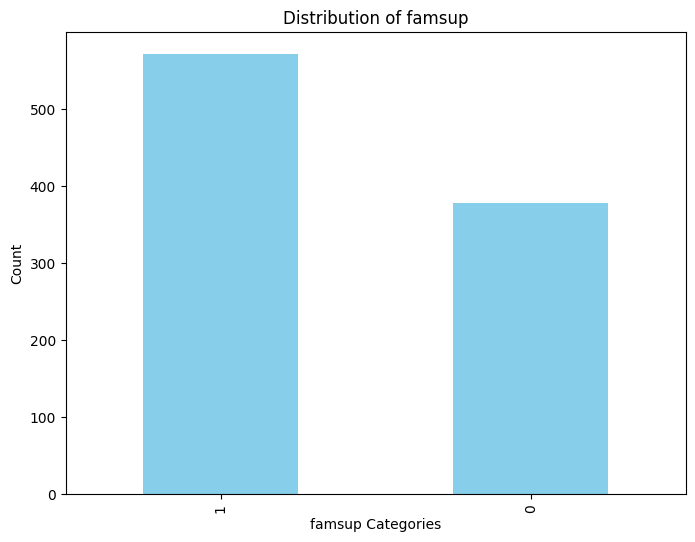

In [26]:
count_table = G1Math_df['famsup'].value_counts()
plt.figure(figsize=(8, 6))
count_table.plot(kind='bar', color='skyblue')
plt.title('Distribution of famsup')
plt.xlabel('famsup Categories')
plt.ylabel('Count')
plt.show()

In [27]:
G1Math_df['famsup'].value_counts()

famsup
1    571
0    377
Name: count, dtype: int64

*** Walc ***


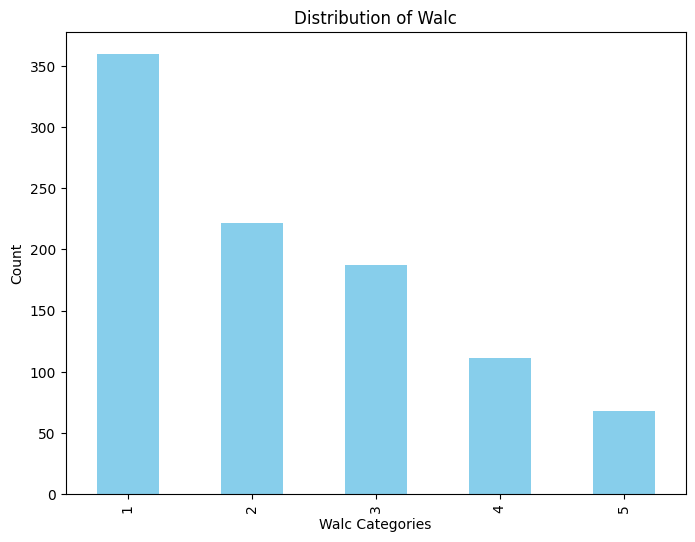

In [28]:
count_table = G1Math_df['Walc'].value_counts()
plt.figure(figsize=(8, 6))
count_table.plot(kind='bar', color='skyblue')
plt.title('Distribution of Walc')
plt.xlabel('Walc Categories')
plt.ylabel('Count')
plt.show()

In [29]:
#calculate IQR and show thw outliers
Q1 = G1Math_df['Walc'].quantile(0.25)
Q3 = G1Math_df['Walc'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_Walc = (G1Math_df['Walc'] < Q1 - 1.5 * IQR) | (G1Math_df['Walc'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_Walc  = G1Math_df.loc[outliers_Walc, 'Walc']
# Display the outlier values
print("Walc :", outliers_Walc)

Q1: 1.0
Q3: 3.0
IQR: 2.0
Out1: -2.0
Out2: 6.0
Walc : Series([], Name: Walc, dtype: int64)


In [30]:
G1Math_df['Walc'].value_counts()
G1Math_df.shape

(948, 31)

*** failures.Port ***

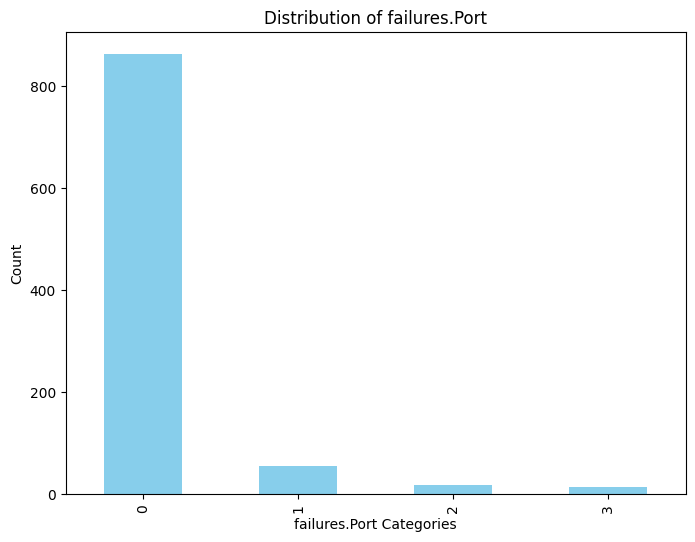

In [31]:
count_table = G1Math_df['failures.Port'].value_counts()
plt.figure(figsize=(8, 6))
count_table.plot(kind='bar', color='skyblue')
plt.title('Distribution of failures.Port')
plt.xlabel('failures.Port Categories')
plt.ylabel('Count')
plt.show()

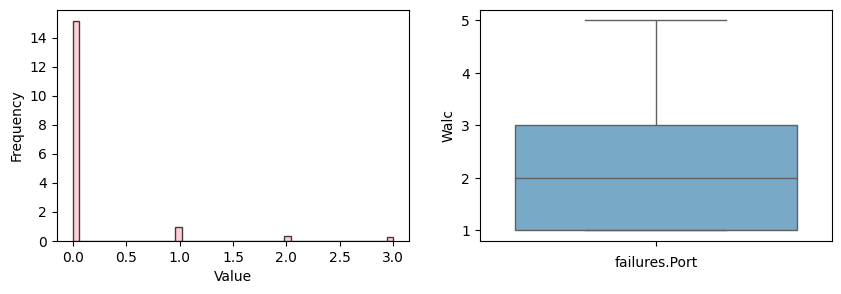

In [32]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(G1Math_df['failures.Port']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='Walc', data=G1Math_df,palette="Blues")
plt.xlabel('failures.Port')
plt.show()

In [33]:
#calculate IQR and show thw outliers
Q1 = G1Math_df['failures.Port'].quantile(0.25)
Q3 = G1Math_df['failures.Port'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_failures_Port = (G1Math_df['failures.Port'] < Q1 - 1.5 * IQR) | (G1Math_df['failures.Port'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_failures_Port = G1Math_df.loc[outliers_failures_Port, 'failures.Port']
# Display the outlier values
#print("failures.Port :", outliers_failures_Port)

Q1: 0.0
Q3: 0.0
IQR: 0.0
Out1: 0.0
Out2: 0.0


*** studytime ***

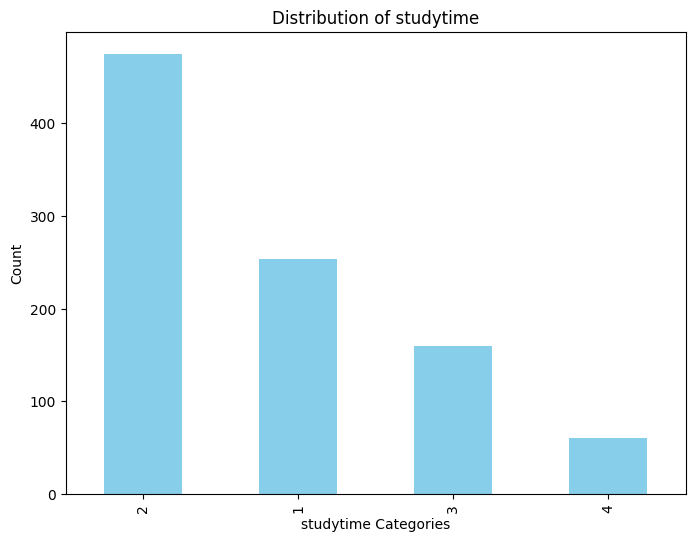

In [34]:
count_table = G1Math_df['studytime'].value_counts()
plt.figure(figsize=(8, 6))
count_table.plot(kind='bar', color='skyblue')
plt.title('Distribution of studytime')
plt.xlabel('studytime Categories')
plt.ylabel('Count')
plt.show()

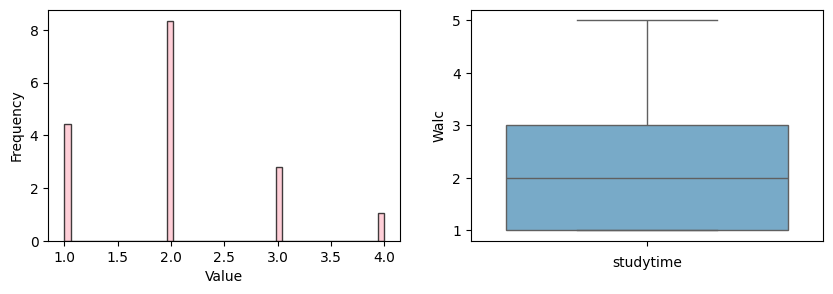

In [35]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(G1Math_df['studytime']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='Walc', data=G1Math_df,palette="Blues")
plt.xlabel('studytime')
plt.show()

In [36]:
#calculate IQR and show thw outliers
Q1 = G1Math_df['studytime'].quantile(0.25)
Q3 = G1Math_df['studytime'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_studytime = (G1Math_df['studytime'] < Q1 - 1.5 * IQR) | (G1Math_df['studytime'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_studytime = G1Math_df.loc[outliers_studytime, 'studytime']
# Display the outlier values
#print("failures.Port :", outliers_studytime)

Q1: 1.0
Q3: 2.0
IQR: 1.0
Out1: -0.5
Out2: 3.5


In [37]:
# check the columns we can see outliers
toll3= G1Math_df.loc[df['studytime']<3.5]
toll1 = G1Math_df.loc[df['studytime']>1]
G1Math_df.shape

(948, 31)

In [38]:
G1Math_df['studytime'].value_counts()

studytime
2    475
1    253
3    160
4     60
Name: count, dtype: int64

*** famrel ***

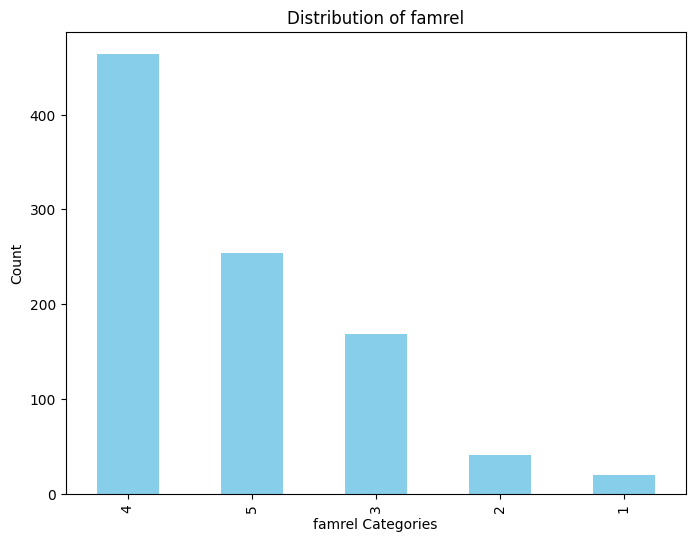

In [39]:
count_table = G1Math_df['famrel'].value_counts()
plt.figure(figsize=(8, 6))
count_table.plot(kind='bar', color='skyblue')
plt.title('Distribution of famrel')
plt.xlabel('famrel Categories')
plt.ylabel('Count')
plt.show()

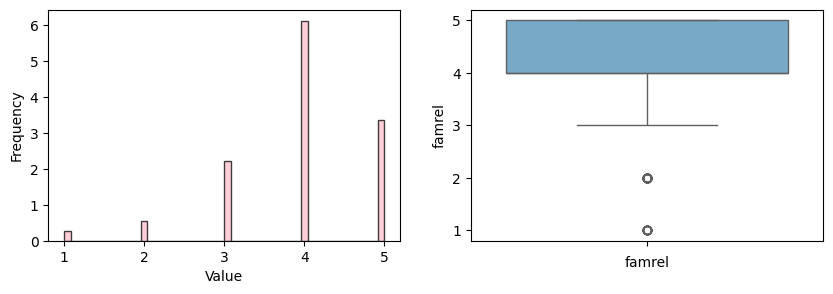

In [40]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(G1Math_df['famrel']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='famrel', data=G1Math_df,palette="Blues")
plt.xlabel('famrel')
plt.show()

In [41]:
#calculate IQR and show thw outliers
Q1 = G1Math_df['famrel'].quantile(0.25)
Q3 = G1Math_df['famrel'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_famrel = (G1Math_df['famrel'] < Q1 - 1.5 * IQR) | (G1Math_df['famrel'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_famrel  = G1Math_df.loc[outliers_famrel, 'famrel']
# Display the outlier values
#print("famrel :", outliers_famrel)

Q1: 4.0
Q3: 5.0
IQR: 1.0
Out1: 2.5
Out2: 6.5


In [42]:
# check the columns we can see outliers
toll = G1Math_df.loc[G1Math_df['famrel']>6.5]
toll.shape

(0, 31)

** G1.Math** 

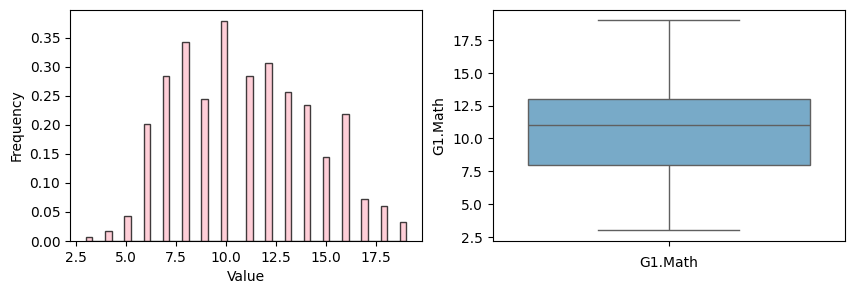

In [43]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(G1Math_df['G1.Math']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='G1.Math', data=df,palette="Blues")
plt.xlabel('G1.Math')
plt.show()

In [44]:
#calculate IQR and show thw outliers
Q1 = G1Math_df['G1.Math'].quantile(0.25)
Q3 = G1Math_df['G1.Math'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_famrel = (G1Math_df['G1.Math'] < Q1 - 1.5 * IQR) | (G1Math_df['G1.Math'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_famrel  = G1Math_df.loc[outliers_famrel, 'G1.Math']
# Display the outlier values
#print("famrel :", outliers_famrel)

Q1: 8.0
Q3: 13.0
IQR: 5.0
Out1: 0.5
Out2: 20.5


In [45]:
# check the columns we can see outliers
toll= G1Math_df.loc[df['G1.Math']>23]
toll.shape

(0, 31)

Dummy variables

If we have categorical variables, we need to change our categorical variables into dummy variables (using get_dummies or OneHotEncoder).
for finding the corrolation the independent variable should be integer so this step we can check the variables are integer, 

In [46]:
intG1Math_df = G1Math_df.select_dtypes(include='integer')
intG1Math_df.columns

Index(['traveltime', 'studytime', 'famsup', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'failures.Math', 'absences.Math', 'G1.Math',
       'failures.Port', 'absences.Port'],
      dtype='object')

In [47]:
# Checking the linear correlation of variables
df2=G1Math_df[[ 
'traveltime', 'studytime', 'famsup', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'failures.Math', 'absences.Math', 'G1.Math',
       'failures.Port', 'absences.Port']]
corr_matrix = df2.corr()
corr_matrix['G1.Math'].sort_values(ascending = False)

G1.Math          1.000000
studytime        0.135777
famrel           0.037323
freetime         0.010579
health          -0.041466
Dalc            -0.049786
absences.Math   -0.064626
Walc            -0.066664
famsup          -0.070687
traveltime      -0.077825
failures.Port   -0.109396
goout           -0.132199
absences.Port   -0.174703
failures.Math   -0.408430
Name: G1.Math, dtype: float64

In [48]:
# Checking the linear correlation of variables
df2=G1Math_df[[ 
'traveltime', 'studytime', 'famsup', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'failures.Math', 'absences.Math', 'G1.Math',
       'failures.Port', 'absences.Port']]
corr_matrix = df2.corr()
threshold = 0.10
highly_correlated_variables = corr_matrix[corr_matrix['G1.Math'].abs() > threshold]['G1.Math'].index.tolist()

# Filter the DataFrame to include only highly correlated variables
subset_df = df2[highly_correlated_variables]
subset_df.columns

Index(['studytime', 'goout', 'failures.Math', 'G1.Math', 'failures.Port',
       'absences.Port'],
      dtype='object')

before creating dummy variable betwen the variables there are study time with corrolation 0.13 and failours.math :-0,40 and absences.port -0.17  is better the others are integer variables. 
in this step we can drop the other coloumns for managing beter ( we dont drop this columns becouse in the task say that famrel,Walc ,famsup,traveltime,failures.Port,absences.Port)

In [49]:
G1Math_df = G1Math_df.drop([ 'freetime','health','Dalc','absences.Math','traveltime',],axis=1)

In [50]:
G1Math_df.columns
G1Math_df.shape

(948, 26)

this step we have 26 independent variables at the first we have 40 variables . 

the type of the categorical variables are object: 
1-school

In [51]:
"""One_hot encoding for ''school'' """
G1Math_df= pd.get_dummies(G1Math_df, columns = ['school'])

2-sex, 

In [52]:
"""One_hot encoding for 'Sex(Gender)' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['sex'])

3-address

In [53]:
"""One_hot encoding for 'address' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['address'])

4- famsize

In [54]:
"""One_hot encoding for 'famsize' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['famsize'])

5- Pstatus

In [55]:
"""One_hot encoding for 'Pstatus' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['Pstatus'])

6- Mjob

In [56]:
"""One_hot encoding for 'Mjob' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['Mjob'])

7- 'Fjob'

In [57]:
"""One_hot encoding for 'Fjob' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['Fjob'])

8- 'reason'

In [58]:
"""One_hot encoding for 'reason' """
G1Math_df= pd.get_dummies(G1Math_df, columns = ['reason'])

9- 'guardian'


In [59]:
"""One_hot encoding for 'guardian' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['guardian'])

10- 'schoolsup'

In [60]:
"""One_hot encoding for 'schoolsup' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['schoolsup'])

11- 'activities'

In [61]:
"""One_hot encoding for 'activities' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['activities'])

12-'nursery'

In [62]:
"""One_hot encoding for 'nursery' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['nursery'])

13- 'higher'


In [63]:
"""One_hot encoding for 'higher' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['higher'])

14- 'internet'


In [64]:
"""One_hot encoding for 'internet' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['internet'])

15-'romantic'


In [65]:
"""One_hot encoding for 'romantic' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['romantic'])

16-paid.Math


In [66]:
"""One_hot encoding for paid.Math """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['paid.Math'])

17- paid.Port


In [67]:
"""One_hot encoding for 'paid.Port' """
G1Math_df = pd.get_dummies(G1Math_df, columns = ['paid.Port'])

In [68]:
#G1Math_df.dtypes
#G1Math_df.info()
#G1Math_df.columns
G1Math_df.shape

(948, 52)

after dummy variable we have 51 columns and the type of them are boolian and again for getting correlation we should be convert them to integer . 


In [69]:
"""Converting 'Object' and 'Boolean' Datatype into int"""
cat_columns = ['sex_F', 'sex_M', 'school_GP',
       'school_MS', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3',
       'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'paid.Math_no', 'paid.Math_yes', 'paid.Port_no',
       'paid.Port_yes']
G1Math_df[cat_columns] = G1Math_df[cat_columns].astype(int)

In [70]:
G1Math_df.columns
#G1Math_df.info()
#G1Math_df.shape

Index(['studytime', 'famsup', 'famrel', 'goout', 'Walc', 'failures.Math',
       'G1.Math', 'failures.Port', 'absences.Port', 'school_GP', 'school_MS',
       'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'activities_no', 'activities_yes', 'nursery_no',
       'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes',
       'romantic_no', 'romantic_yes', 'paid.Math_no', 'paid.Math_yes',
       'paid.Port_no', 'paid.Port_yes'],
      dtype='object')

In [71]:
# Checking the linear correlation of variables
df2=G1Math_df[['studytime', 'famsup', 'famrel', 'goout', 'Walc', 'failures.Math',
       'G1.Math', 'failures.Port', 'absences.Port', 'school_GP', 'school_MS',
       'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'activities_no', 'activities_yes', 'nursery_no',
       'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes',
       'romantic_no', 'romantic_yes', 'paid.Math_no', 'paid.Math_yes',
       'paid.Port_no', 'paid.Port_yes']]
corr_matrix = df2.corr()
corr_matrix['G1.Math'].sort_values(ascending = False)

G1.Math              1.000000
higher_yes           0.238948
sex_M                0.172840
Fjob_teacher         0.171032
schoolsup_no         0.168868
famsize_LE3          0.141276
Mjob_services        0.139865
nursery_yes          0.137406
studytime            0.135777
Mjob_teacher         0.126588
Fjob_at_home         0.119396
address_U            0.100673
Mjob_health          0.090134
romantic_no          0.083081
paid.Math_yes        0.054597
activities_yes       0.050150
paid.Port_no         0.046872
guardian_mother      0.039741
famrel               0.037323
guardian_father      0.032352
internet_yes         0.028313
reason_home          0.015571
Fjob_health          0.013716
reason_reputation    0.013310
Fjob_services        0.012592
school_GP            0.004570
Pstatus_T            0.002447
Pstatus_A           -0.002447
reason_other        -0.002840
school_MS           -0.004570
reason_course       -0.025761
internet_no         -0.028313
paid.Port_yes       -0.046872
activities

In [72]:
# Checking the linear correlation of variables
df2=G1Math_df[[ 
'studytime', 'famsup', 'famrel', 'goout', 'Walc', 'failures.Math',
       'G1.Math', 'failures.Port', 'absences.Port', 'school_GP', 'school_MS',
       'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'activities_no', 'activities_yes', 'nursery_no',
       'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes',
       'romantic_no', 'romantic_yes', 'paid.Math_no', 'paid.Math_yes',
       'paid.Port_no', 'paid.Port_yes']]
corr_matrix = df2.corr()
threshold = 0.15
highly_correlated_variables = corr_matrix[corr_matrix['G1.Math'].abs() > threshold]['G1.Math'].index.tolist()

# Filter the DataFrame to include only highly correlated variables
subset_df = df2[highly_correlated_variables]
subset_df.columns

Index(['failures.Math', 'G1.Math', 'absences.Port', 'sex_F', 'sex_M',
       'Mjob_other', 'Fjob_other', 'Fjob_teacher', 'schoolsup_no',
       'schoolsup_yes', 'higher_no', 'higher_yes'],
      dtype='object')

so fo this correlation we only use failers.math and heigher_yes, sex_M , and he other coloumns we need for them . 

In [73]:
# Specify the columns you want to keep
selected_columns = ['G1.Math','absences.Port', 'famsup', 'Walc','failures.Port','famrel', 'higher_yes','studytime','sex_M','failures.Math',   'sex_F',
       'Mjob_other', 'Fjob_other', 'Fjob_teacher', 'schoolsup_no',
       'schoolsup_yes', 'higher_no',]

# Create a new DataFrame with only the selected columns
G1Math_df2 = G1Math_df[selected_columns]

# Display the new DataFrame
print(G1Math_df2)

     G1.Math  absences.Port  famsup  Walc  failures.Port  famrel  higher_yes  \
0         11              0       1     2              0       3           1   
1          6              0       0     3              1       5           1   
2          9              4       1     2              0       2           1   
3          9             14       1     4              1       5           1   
4          8              2       1     4              0       3           1   
..       ...            ...     ...   ...            ...     ...         ...   
943       12              8       1     2              0       1           1   
944       15              0       1     2              0       4           1   
945       19              0       1     1              0       4           1   
946       12              0       0     1              0       4           1   
947        9              0       0     2              0       4           1   

     studytime  sex_M  failures.Math  s

### 4.2 Correlation between different features:
Correlation is the way of understanding the strength of the relationship between 2 variables or features in a dataset. Correlation coefficients determine this strength by indicating a value between [-1,1] where -1 indicates a very strong negative relationship, 0 indicates no relationship and 1 indicates strong positive relationship. Pearson correlation is one of the most widely used correlation method and it indicates the linear relationship between 2 variables. The heatmap of correlation between all variables of the dataset is given bellow: 

after checking the corrolation I selected failures.Math,  higher_yes ,failures.Math, for finding the model becouase this variable has corrolation with G1.math more than another columns.


<Axes: >

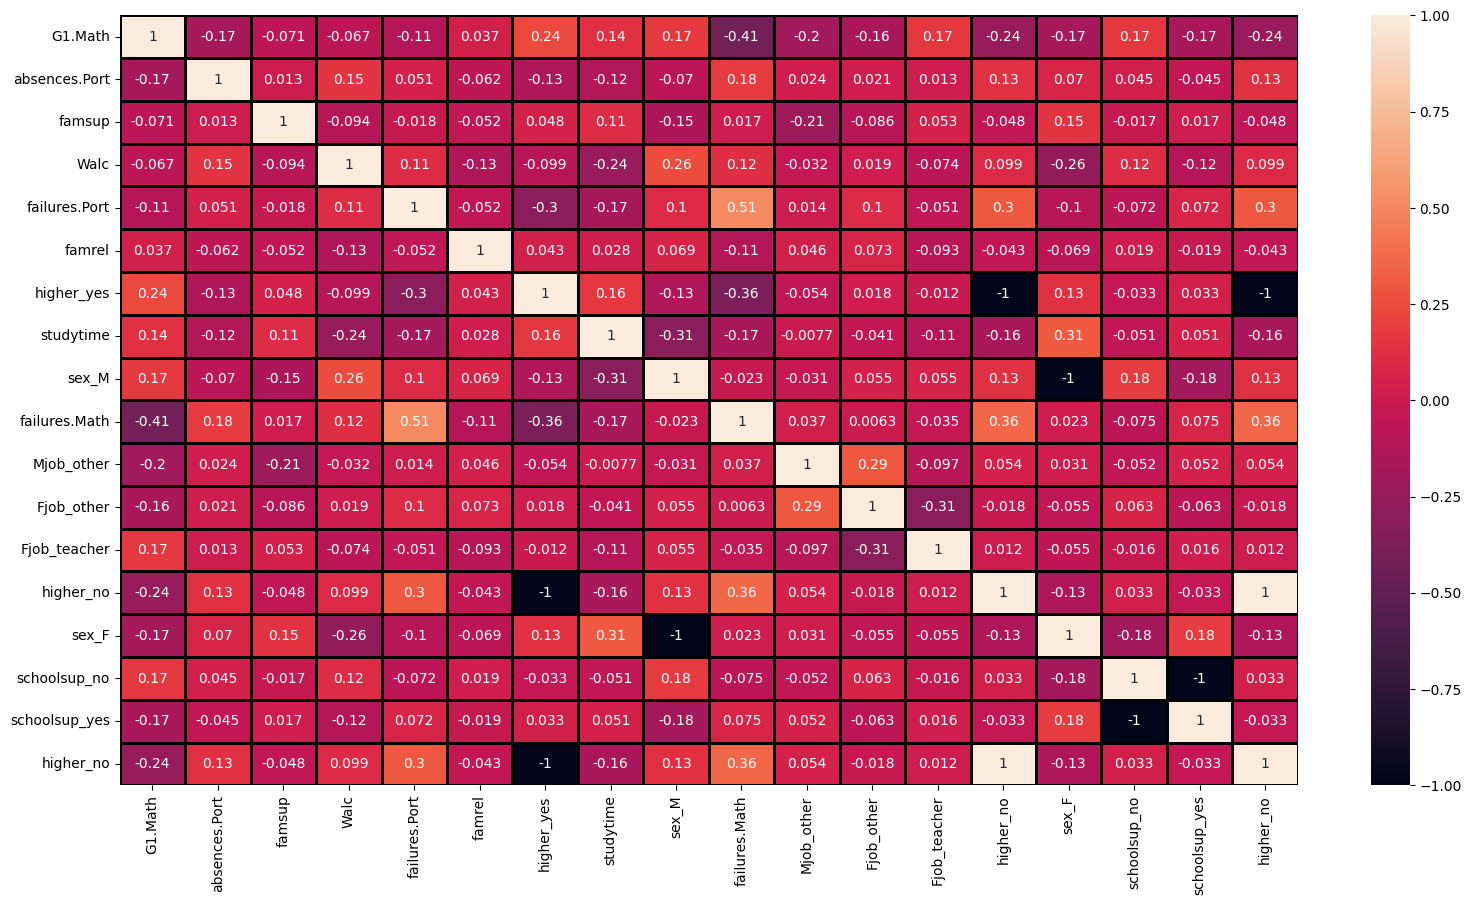

In [74]:
#| label: Get correlation visually
plt.figure(figsize = (19,10))
sns.heatmap(G1Math_df2[['G1.Math','absences.Port', 'famsup', 'Walc','failures.Port','famrel', 'higher_yes','studytime','sex_M','failures.Math',
       'Mjob_other', 'Fjob_other', 'Fjob_teacher','higher_no','sex_F', 'schoolsup_no',
       'schoolsup_yes', 'higher_no', ]].corr(),annot=True, annot_kws={"size": 10}, linewidth=1, linecolor="black")

In [75]:
# Specify the columns you want to keep
selected_columns = ['G1.Math','absences.Port', 'famsup', 'Walc','failures.Port','famrel', 'higher_yes','studytime','sex_M','failures.Math',
       'Mjob_other', 'Fjob_other', 'Fjob_teacher',
       'schoolsup_yes',]

# Create a new DataFrame with only the selected columns
G1Math_df2 = G1Math_df[selected_columns]

# Display the new DataFrame
print(G1Math_df2)

     G1.Math  absences.Port  famsup  Walc  failures.Port  famrel  higher_yes  \
0         11              0       1     2              0       3           1   
1          6              0       0     3              1       5           1   
2          9              4       1     2              0       2           1   
3          9             14       1     4              1       5           1   
4          8              2       1     4              0       3           1   
..       ...            ...     ...   ...            ...     ...         ...   
943       12              8       1     2              0       1           1   
944       15              0       1     2              0       4           1   
945       19              0       1     1              0       4           1   
946       12              0       0     1              0       4           1   
947        9              0       0     2              0       4           1   

     studytime  sex_M  failures.Math  M

and check it again 

<Axes: >

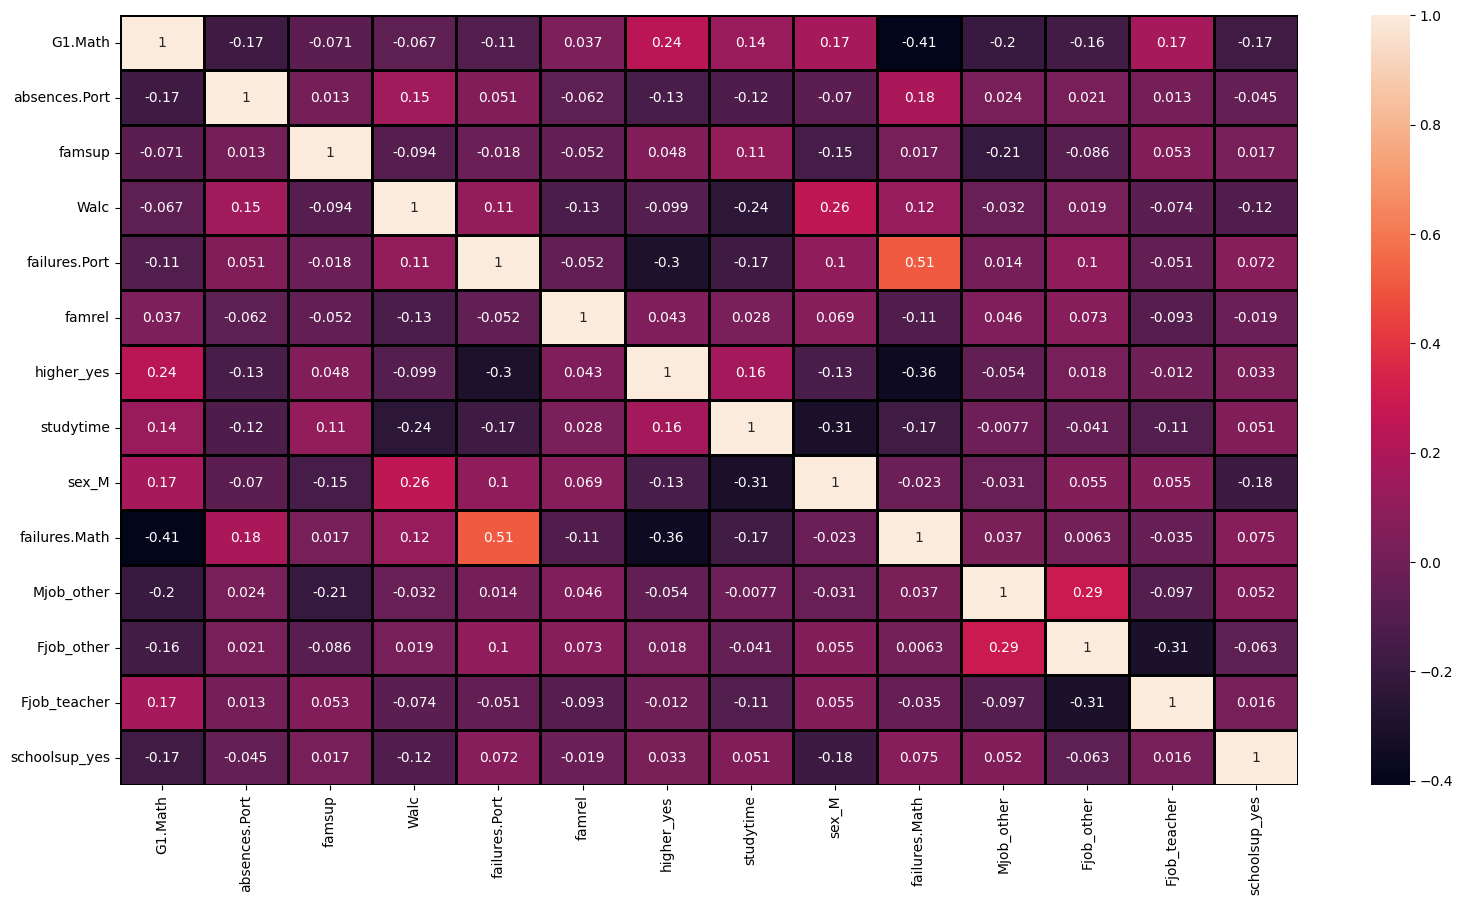

In [76]:
#| label2: Get correlation visually
plt.figure(figsize = (19,10))
sns.heatmap(G1Math_df2[['G1.Math','absences.Port', 'famsup', 'Walc','failures.Port','famrel', 'higher_yes','studytime','sex_M','failures.Math','Mjob_other', 'Fjob_other', 'Fjob_teacher','schoolsup_yes' ]].corr(),annot=True, annot_kws={"size": 10}, linewidth=1, linecolor="black")

so we can drop 'higher_no','sex_F', 'schoolsup_no' becase they are heigh correlation with another part in our groups.

as you can see , there are a corrolation between failer.math and the failers.port: 0.51 and G1.math and failer.math corrolation is minus and G1.math and heier_yes has corelation +0.24 .


In [77]:
# Checking the linear correlation of variables
df2=G1Math_df2[['G1.Math','absences.Port', 'famsup', 'Walc','failures.Port','famrel', 'higher_yes','studytime','sex_M','failures.Math','Mjob_other', 'Fjob_other', 'Fjob_teacher','schoolsup_yes']]
corr_matrix = df2.corr()
corr_matrix['G1.Math'].sort_values(ascending = False)

G1.Math          1.000000
higher_yes       0.238948
sex_M            0.172840
Fjob_teacher     0.171032
studytime        0.135777
famrel           0.037323
Walc            -0.066664
famsup          -0.070687
failures.Port   -0.109396
Fjob_other      -0.155950
schoolsup_yes   -0.168868
absences.Port   -0.174703
Mjob_other      -0.195658
failures.Math   -0.408430
Name: G1.Math, dtype: float64

In [78]:
# Checking the linear correlation of variables
df2=G1Math_df[[ 
'G1.Math','absences.Port', 'famsup', 'Walc','failures.Port','famrel', 'higher_yes','studytime','sex_M','failures.Math','Mjob_other', 'Fjob_other', 'Fjob_teacher','schoolsup_yes']]
corr_matrix = df2.corr()
threshold = 0.15
highly_correlated_variables = corr_matrix[corr_matrix['G1.Math'].abs() > threshold]['G1.Math'].index.tolist()

# Filter the DataFrame to include only highly correlated variables
subset_df = df2[highly_correlated_variables]
subset_df.columns

Index(['G1.Math', 'absences.Port', 'higher_yes', 'sex_M', 'failures.Math',
       'Mjob_other', 'Fjob_other', 'Fjob_teacher', 'schoolsup_yes'],
      dtype='object')

In [79]:
G1Math_df2.columns

Index(['G1.Math', 'absences.Port', 'famsup', 'Walc', 'failures.Port', 'famrel',
       'higher_yes', 'studytime', 'sex_M', 'failures.Math', 'Mjob_other',
       'Fjob_other', 'Fjob_teacher', 'schoolsup_yes'],
      dtype='object')

The given values represent the correlation coefficients between the 'G1.Math' variable and other variables in the dataset. Here's an explanation:

G1.Math: This is the target variable.
Positive Correlations:

higher_yes: There is a positive correlation of approximately 0.24 between 'higher_yes' (aspiration for higher education) and 'G1.Math'. This suggests that students who aspire to pursue higher education tend to have higher grades in the first period.
sex_M: There is a positive correlation of approximately 0.17 between 'sex_M' (male gender) and 'G1.Math'. This implies that male students may have slightly higher grades in the first period.
Fjob_teacher: There is a positive correlation of approximately 0.17 between 'Fjob_teacher' (father's job as a teacher) and 'G1.Math'. This indicates that students whose fathers work as teachers may have slightly higher grades.
Negative Correlations:

studytime: There is a positive correlation of approximately 0.14 between 'studytime' and 'G1.Math'. This implies that students who spend more time studying may have slightly higher grades.
famrel: There is a positive correlation of approximately 0.04 between 'famrel' (quality of family relationships) and 'G1.Math'. This suggests that students with better family relationships may have slightly higher grades.
Negative Correlations:

Walc: There is a negative correlation of approximately -0.07 between 'Walc' (weekend alcohol consumption) and 'G1.Math'. This indicates a slight tendency that higher weekend alcohol consumption may be associated with slightly lower grades.
famsup: There is a negative correlation of approximately -0.07 between 'famsup' (family educational support) and 'G1.Math'. This suggests that students who receive more family educational support may have slightly lower grades.
failures.Port: There is a negative correlation of approximately -0.11 between 'failures.Port' (number of past class failures in the Portuguese subject) and 'G1.Math'. This indicates that students with fewer past class failures in the Portuguese subject tend to have higher grades.
Fjob_other: There is a negative correlation of approximately -0.17 between 'Fjob_other' (father's job other than teacher, health, or services) and 'G1.Math'. This implies that students whose fathers have jobs other than teacher, health, or services may have slightly lower grades.
schoolsup_yes: There is a negative correlation of approximately -0.17 between 'schoolsup_yes' (extra educational support at school) and 'G1.Math'. This suggests that students receiving extra educational support at school may have slightly lower grades.
absences.Port: There is a negative correlation of approximately -0.17 between 'absences.Port' (number of school absences in the Portuguese subject) and 'G1.Math'. This implies that students with fewer school absences may have higher grades.
failures.Math: There is a negative correlation of approximately -0.41 between 'failures.Math' (number of past class failures in the Mathematics subject) and 'G1.Math'. This indicates a strong negative correlation, suggesting that students with fewer past class failures in the Mathematics subject tend to have higher grades

## 5. Data Analysis (Visualization and checking the distribution of each variable)

### 5.1 Data Modeling


In [80]:
G1Math_df2['G1.Math'].unique()
G1Math_df2['G1.Math'].value_counts()
#G1Math_df2.info()

G1.Math
10    115
8     104
12     93
11     86
7      86
13     78
9      74
14     71
16     66
6      61
15     44
17     22
18     18
5      13
19     10
4       5
3       2
Name: count, dtype: int64

A summary of each algorithm is described below.

Logistic Regression is a classification method used when the Response column is categorical with only two possible values. The probability of the possible outcomes is modeled with a logistic transformation as a weighted sum of the Predictor columns. The weights or regression coefficients are selected to maximize the likelihood of the observed data.

Linear Discriminant Analysis or Normal Discriminant Analysis or Discriminant Function Analysis is a dimensionality reduction technique that is commonly used for supervised classification problems. It is used for modelling differences in groups i.e. separating two or more classes. It is used to project the features in higher dimension space into a lower dimension space. Linear discriminant analysis is popular when we have more than two response classes, because it also provides low-dimensional views of the data

K-Nearest Neighbors algorithm, also known as KNN or k-NN, is a non-parametric algorithm (which means it does not make any assumption on underlying data), supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. a class label is assigned based on a majority vote.

Decision Tree is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered. The model is a form of supervised learning, meaning that the model is trained and tested on a set of data that contains the desired categorization. The tree can be explained by two entities, namely decision nodes and leaves.

Random Forest is a collection (a.k.a. ensemble) of many decision trees. A decision tree is a flow chart which separates data based on some condition. If a condition is true, you move on a path otherwise, you move on to another path.

### 5.2 Model Selection Task 1


In [81]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In order to select my classifier, I performed a 10-fold cross validation algorithm on the above-mentioned classification models and calculated the accuracy (average of all 10 folds) of each model. The result of the cross validation is as follows:


In [82]:
# Selecting features and target variable
x = G1Math_df2.drop(['G1.Math', ], axis=1)
y = G1Math_df2['G1.Math']

# Splitting the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Defining classification models
models = [
     ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('DTC', DecisionTreeClassifier()),
    ('RFM', RandomForestClassifier(n_jobs=-1))
]

# 10-fold cross-validation
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, xtrain_scaled, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.215193 (0.046488)
KNN: 0.477509 (0.049930)
DTC: 0.840439 (0.038201)
RFM: 0.849579 (0.043577)


as you can see the RFM has the best accuracy and after that DTC can be selected for this model between the other classifier models.

### 5.3 Improving the model Task 1 


In [83]:
G1Math_df2.head()
G1Math_df2.info()
G1Math_df2.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   G1.Math        948 non-null    int64
 1   absences.Port  948 non-null    int64
 2   famsup         948 non-null    int32
 3   Walc           948 non-null    int64
 4   failures.Port  948 non-null    int64
 5   famrel         948 non-null    int64
 6   higher_yes     948 non-null    int32
 7   studytime      948 non-null    int64
 8   sex_M          948 non-null    int32
 9   failures.Math  948 non-null    int64
 10  Mjob_other     948 non-null    int32
 11  Fjob_other     948 non-null    int32
 12  Fjob_teacher   948 non-null    int32
 13  schoolsup_yes  948 non-null    int32
dtypes: int32(7), int64(7)
memory usage: 77.9 KB


Index(['G1.Math', 'absences.Port', 'famsup', 'Walc', 'failures.Port', 'famrel',
       'higher_yes', 'studytime', 'sex_M', 'failures.Math', 'Mjob_other',
       'Fjob_other', 'Fjob_teacher', 'schoolsup_yes'],
      dtype='object')

In [84]:
df2=G1Math_df2[['G1.Math', 'absences.Port', 'famsup', 'Walc', 'failures.Port', 'famrel',
       'higher_yes', 'studytime', 'sex_M', 'failures.Math', 'Mjob_other',
       'Fjob_other', 'Fjob_teacher', 'schoolsup_yes']]

corr_matrix = df2.corr()
corr_matrix['G1.Math'].sort_values(ascending = False)

G1.Math          1.000000
higher_yes       0.238948
sex_M            0.172840
Fjob_teacher     0.171032
studytime        0.135777
famrel           0.037323
Walc            -0.066664
famsup          -0.070687
failures.Port   -0.109396
Fjob_other      -0.155950
schoolsup_yes   -0.168868
absences.Port   -0.174703
Mjob_other      -0.195658
failures.Math   -0.408430
Name: G1.Math, dtype: float64

To check this more precisely, I removed schoolsup_yes from my feature variables and performed a Random Forest Classifier model. I split my data set into train (80% of the observation) and test (20% of the observation), fitted the model on train data and performed a prediction on my test data. The classification report is as follows; the accuracy reduced to 81%.


In [85]:
# RandomForestClassifier without removing schoolsup_yes,  prediction and classification report and score
x = G1Math_df2.drop(['G1.Math'], axis=1)
y = G1Math_df2['G1.Math']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=20, n_jobs=-1)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

score = model.score(xtest, ytest)
print(score)

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 14  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 19  0  2  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  0 11  0  0  0  1  0  1  0  0  0]
 [ 0  0  0  1  1  0  0 20  1  1  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  2  9  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  2  0  0 14  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1

 with out removing the schoolsup_yes we have 86% accuracy 
and the roc-auc for each classess between 89 to 1 . 

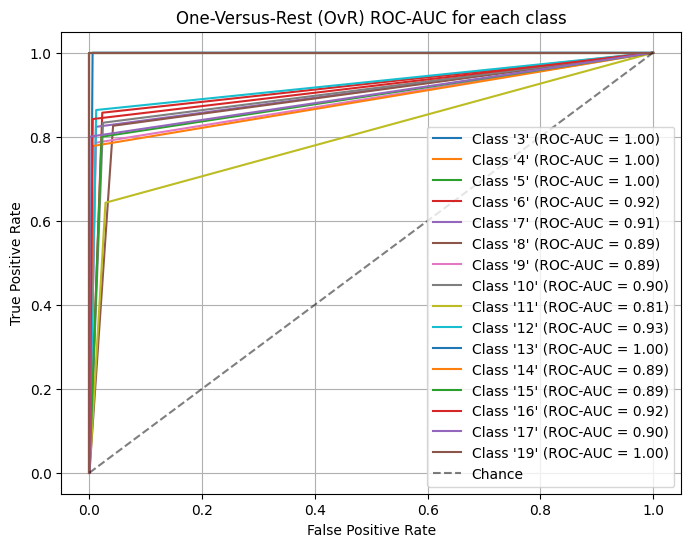

In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
# Assuming y_test and ypred are your true labels and predicted labels respectively

# Binarize the labels
lb = LabelBinarizer()
y_test = lb.fit_transform(ytest)
ypred = lb.transform(ypred)

# Calculate ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(lb.classes_)):
    fpr, tpr, _ = roc_curve(y_test[:, i], ypred[:, i])
    roc_auc_class = roc_auc_score(y_test[:, i], ypred[:, i])
    plt.plot(fpr, tpr, label=f"Class '{lb.classes_[i]}' (ROC-AUC = {roc_auc_class:.2f})")

# Plotting for random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Chance', alpha=0.5)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-Versus-Rest (OvR) ROC-AUC for each class')
plt.legend()
plt.grid()
plt.show()

I drop the schoolsup_yes for checking the model  

In [87]:
# Selecting features and target variable
x = G1Math_df2.drop(['G1.Math','schoolsup_yes' ], axis=1)
y = G1Math_df2['G1.Math']

# Splitting the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Defining classification models
models = [
     ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('DTC', DecisionTreeClassifier()),
    ('RFM', RandomForestClassifier(n_jobs=-1))
]

# 10-fold cross-validation
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, xtrain_scaled, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.188860 (0.055255)
KNN: 0.457754 (0.056195)
DTC: 0.835123 (0.041403)
RFM: 0.837737 (0.049459)


**Dropping columns and fitting the model**


In [88]:
x = G1Math_df2.drop(['schoolsup_yes','G1.Math'], axis=1)
y = G1Math_df['G1.Math']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = model = RandomForestClassifier()
model.fit(xtrain , ytrain)

RandomForestClassifier()

In [89]:
# 10 fold cross validation on training data
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 10)

scores = cross_val_score(model, xtrain, ytrain, cv =k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.82894737 0.85526316 0.88157895 0.82894737 0.75       0.86842105
 0.90789474 0.78947368 0.89333333 0.8       ]
Average CV Score:  0.8403859649122808
Number of CV Scores used in Average:  10


To check this more precisely, I removed schoolsup_yes from my feature variables and performed a Random Forest Classifier model. I split my data set into train (80% of the observation) and test (20% of the observation), fitted the model on train data and performed a prediction on my test data. The classification report is as follows; 
model's average cross-validation score is approximately 0.88, and this is the average performance across the 10 folds. It provides an estimate of how well  model is expected to generalize to new, unseen data.

### 5.4 Model Selection Task 2 
Task 2: Bin the target variable G1. Math is divided into 3 categories in such a way that the resulting bins contain roughly an equal number of cases. Use this newly created categorical variable as response for a classification model. Again, do not use any other grade feature and build a model that contains the variables absences. Port, famsup, Walc, failures. Port, study time, famrel but not the variables Fedu, Medu, age.
After categorizing we can check the data with the classification, after training the data an prediction we can check the accuracy and select the best algorithm with the high accuracy.


In [90]:
G1Math_df2.columns

Index(['G1.Math', 'absences.Port', 'famsup', 'Walc', 'failures.Port', 'famrel',
       'higher_yes', 'studytime', 'sex_M', 'failures.Math', 'Mjob_other',
       'Fjob_other', 'Fjob_teacher', 'schoolsup_yes'],
      dtype='object')

In [91]:
from sklearn.preprocessing import KBinsDiscretizer
# Select features and target variable
features = ['G1.Math', 'absences.Port', 'famsup', 'Walc', 'failures.Port', 'famrel',
       'higher_yes', 'studytime', 'sex_M', 'failures.Math', 'Mjob_other',
       'Fjob_other', 'Fjob_teacher', 'schoolsup_yes' ]
target = 'G1.Math'


# Bin the target variable into 3 categories
k_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
G1Math_df2['G1.Math_binned'] = k_bins.fit_transform(G1Math_df2[[target]])

# Select features and the binned target variable for the model
X = G1Math_df2[features]
y = G1Math_df2['G1.Math_binned']

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In this matrix:

True Positives (TP):

TP for Class 0 (first row, first column): 52 instances were correctly predicted as Class 0.
TP for Class 1 (second row, second column): 41 instances were correctly predicted as Class 1.
TP for Class 2 (third row, third column): 78 instances were correctly predicted as Class 2.
False Positives (FP):

FP for Class 0 (first row, second and third columns): 4 instances of Class 0 were incorrectly predicted as Class 1, and 1 instance was incorrectly predicted as Class 2.
FP for Class 1 (second row, first and third columns): 5 instances of Class 1 were incorrectly predicted as Class 0, and 6 instances were incorrectly predicted as Class 2.
FP for Class 2 (third row, first and second columns): 2 instances of Class 2 were incorrectly predicted as Class 0, and 1 instance was incorrectly predicted as Class 1.
True Negatives (TN):
The remaining entries outside the diagonal are not explicitly mentioned in a confusion matrix, but they represent instances that were correctly predicted as classes other than the one specified by the row.

False Negatives (FN):

FN for Class 0 (first row, remaining columns): 1 instance of Class 0 was incorrectly predicted as either Class 1 or Class 2.
FN for Class 1 (second row, remaining columns): 6 instances of Class 1 were incorrectly predicted as either Class 0 or Class 2.
FN for Class 2 (third row, remaining columns): 6 instances of Class 2 were incorrectly predicted as either Class 0 or Class 1.

These values in the confusion matrix help evaluate the performance of a classification model by showing how many instances were correctly or incorrectly predicted for each class.
I check the models again by k-fold to find better differential result:  the accuracy of  RFM: 90% and in this category we have better accuracy when we have about 18 category.


In [92]:
# Selecting features and target variable
x = G1Math_df2.drop(['G1.Math_binned','G1.Math' ], axis=1)
y = G1Math_df2['G1.Math_binned']

# Splitting the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Defining classification models
models = [
     ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('DTC', DecisionTreeClassifier()),
    ('RFM', RandomForestClassifier(n_jobs=-1))
]

# 10-fold cross-validation
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, xtrain_scaled, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.563316 (0.056017)
KNN: 0.651614 (0.060970)
DTC: 0.899702 (0.034045)
RFM: 0.903667 (0.016887)


In [93]:
# RandomForestClassifier,  prediction and classification report and score

model = RandomForestClassifier(n_estimators=20, n_jobs=-1)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

score = model.score(xtest, ytest)
print(score)

[[52  3  2]
 [ 5 41  6]
 [ 2  1 78]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90        57
         1.0       0.91      0.79      0.85        52
         2.0       0.91      0.96      0.93        81

    accuracy                           0.90       190
   macro avg       0.90      0.89      0.89       190
weighted avg       0.90      0.90      0.90       190

0.9


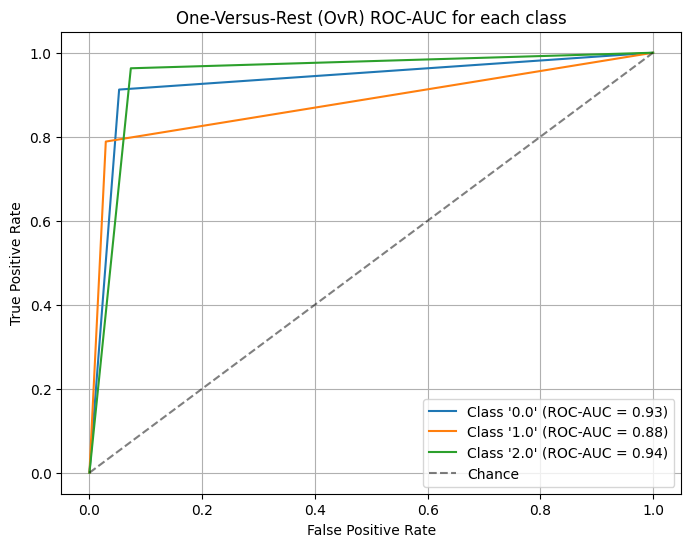

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(ytest)
ypred_bin = lb.transform(ypred)

# Calculate ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(lb.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], ypred_bin[:, i])
    roc_auc_class = roc_auc_score(y_test_bin[:, i], ypred_bin[:, i])
    plt.plot(fpr, tpr, label=f"Class '{lb.classes_[i]}' (ROC-AUC = {roc_auc_class:.2f})")

# Plotting for random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Chance', alpha=0.5)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-Versus-Rest (OvR) ROC-AUC for each class')
plt.legend()
plt.grid()
plt.show()

In [95]:
# 10 fold cross validation on training data
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 10)

scores = cross_val_score(model, xtrain, ytrain, cv =k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.90789474 0.90789474 0.94736842 0.88157895 0.88157895 0.94736842
 0.90789474 0.81578947 0.90666667 0.86666667]
Average CV Score:  0.8970701754385966
Number of CV Scores used in Average:  10


 Number of CV Scores used in Average:  10
 the average accuracy across the 10 folds is approximately 0.8932, or 89.32%.
 the average cross-validation score provides an estimate of the model's performance that is less sensitive to the choice of a particular training/test split, giving you a more robust evaluation metric.
at the end If accuracy increases while the area under the ROC curve (AUC) decreases, it means that there is an improvement in correctly identifying positive samples (True Positives) and a reduction in misclassifying samples from other classes (False Positives). With increased accuracy, the model demonstrates better capability in correctly identifying positive class instances.
However, if AUC decreases, it indicates a change in the balance between the True Positive rate and False Positive rate. The model may perform better in detecting positive samples, but it might struggle in reducing False Negatives, which could be crucial in specific applications, depending on the nature of the problem.
In general, an increase in AUC signifies an improvement in the model's ability to differentiate between classes, while an increase in accuracy indicates an overall enhancement in the model's ability to correctly identify instances. 


## 6-Results and Conclusions:

in this data set we have a little correlation between features but by cleaning and preprocessing we tr the best feature in this data set after with visualization founding the outliers for dropping the data set , for using the model we have a integer and the data in G1.math is Discontinuous so we use the classification but the category of the data is range of 1 to zero so by correlation low between the target and the other feature is it hart to access the high accuracy and we have the 86 % and for better accuracy we drop some columns and check it again , in task 2 we have the 3 category of the grade the grade in each category have little variance and big variance between the other categories, so it help us to have a good accuracy and good roc-auc . 
at the end I think is good idea categorizing the data for better accuracy and found the best feature for best prediction.
## 7.References

1-	https://towardsdatascience.com/beginner-guide-to-build-compare-and-evaluate-machine-learning-models-in-under-10-minutes-19a6781830de

2-	https://github.com/Mesgarin/DAPJFinal/tree/main